In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas_ta as ta

pd.set_option("display.max_rows", None)
database_name = "TSX_Quality.sqlite"

### Utility function to get prices from our local database  

In [2]:
def get_prices_for(symbol):
    conn = sqlite3.connect(database_name)
    
    # Make sur all dates are in ascending order
    sql = f"SELECT * FROM Prices_Daily WHERE Ticker = '{symbol}' ORDER BY UPPER(Ticker) ASC, Date ASC"
    prices = pd.read_sql_query(sql, conn, index_col="Date")
    prices.index = pd.to_datetime(prices.index)
    
    # Clean up CSV data to make sure we have only floats and no "-" values
    prices.replace("-", np.NaN, inplace=True)
    #prices["Volume"].replace(0, np.NaN, inplace=True)
    prices["Open"] = prices["Open"].astype(float)
    prices["High"] = prices["High"].astype(float)
    prices["Low"]  = prices["Low"].astype(float)
    prices["Close"]= prices["Close"].astype(float)
    
    # Required for finTA
    prices.rename(columns={"Ticker":"ticker", "Open":"open", "High":"high", "Low":"low", "Close":"close", "Volume":"volume"}, inplace=True)
    prices.index.rename("date", inplace=True) 
    
    return prices

In [3]:
# PANDAS_TA works with our data structure that includes a column with the Tcker symbol
symbol = "LI"
df = get_prices_for(symbol)
df.tail(10)

,ticker,open,high,low,close,volume
date,,,,,,
2022-01-11,LI,3.98,4.18,3.91,4.05,618700.0
2022-01-12,LI,4.10,4.18,4.03,4.03,322700.0
2022-01-13,LI,3.98,3.98,3.78,3.86,417200.0
2022-01-14,LI,3.68,3.74,3.62,3.73,617800.0
2022-01-17,LI,3.62,3.62,3.49,3.54,333100.0
2022-01-18,LI,3.38,3.39,3.26,3.28,958900.0
2022-01-19,LI,3.16,3.18,2.97,3.09,1429200.0
2022-01-20,LI,3.12,3.59,3.12,3.24,1039700.0
2022-01-21,LI,3.14,3.19,2.98,3.12,840600.0


In [85]:
# RSI Indicator 
# help(ta.rsi)
# df["RSI"] = ta.rsi(df["close"], length=10)
# df.ta.rsi(length=10, append = True)
# df.ta.rsi(length=14, append = True)
# df.ta.sma(length=100, append = True)
# df.ta.ema(length=10, append = True)
st = ta.supertrend(df["high"], df["low"], df["close"], append=True)
df["ST_VAL"] = st["SUPERT_7_3.0"]
df["ST_DIR"] = st["SUPERTd_7_3.0"]
df["ST_UPP"] = st["SUPERTl_7_3.0"]
df["ST_LOW"] = st["SUPERTs_7_3.0"]
df.tail(10)


,ticker,open,high,low,close,volume,ST_VAL,ST_DIR,ST_UPP,ST_LOW
date,,,,,,,,,,
2022-01-11,LI,3.98,4.18,3.91,4.05,618700.0,4.743281,-1,NaN,4.743281
2022-01-12,LI,4.10,4.18,4.03,4.03,322700.0,4.743281,-1,NaN,4.743281
2022-01-13,LI,3.98,3.98,3.78,3.86,417200.0,4.692941,-1,NaN,4.692941
2022-01-14,LI,3.68,3.74,3.62,3.73,617800.0,4.479663,-1,NaN,4.479663
2022-01-17,LI,3.62,3.62,3.49,3.54,333100.0,4.343283,-1,NaN,4.343283
2022-01-18,LI,3.38,3.39,3.26,3.28,958900.0,4.120671,-1,NaN,4.120671
2022-01-19,LI,3.16,3.18,2.97,3.09,1429200.0,3.889861,-1,NaN,3.889861
2022-01-20,LI,3.12,3.59,3.12,3.24,1039700.0,3.889861,-1,NaN,3.889861
2022-01-21,LI,3.14,3.19,2.98,3.12,840600.0,3.889861,-1,NaN,3.889861


In [62]:
df.index[-5:]

DatetimeIndex(['2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
               '2022-01-24'],
              dtype='datetime64[ns]', name='date', freq=None)

In [63]:
df.loc[df.index[-5:], ["close"]]

,close
date,
2022-01-18,3.28
2022-01-19,3.09
2022-01-20,3.24
2022-01-21,3.12
2022-01-24,2.87


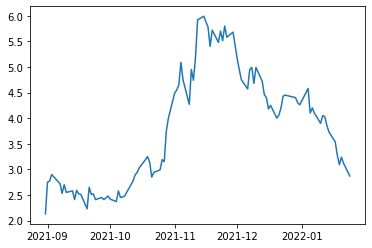

In [69]:
df_sub = df.loc[df.index[-100:]]
plt.plot(df_sub.index, df_sub["close"])
#plt.plot(df.index, df["RSI_10"])
# plt.plot(df.index, df["SMA_100"])
# plt.plot(df.index, df["EMA_10"])
plt.show()


In [ ]:
# Holy Grail Strategy
